# National overdoses due to cocaine and synthetic opioids by year (2010-2016)

This notebook produces a table and bar chart of national overdoses due to cocaine and synthetic opioids by year.

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rcParams


## Set some matplot properties for aesthetics

In [2]:
# space between headline and axis
rcParams['axes.titlepad'] = 20 

In [3]:
# Add fonts if available

# check for avenir
if os.path.isfile("../fonts/AvenirNext-Regular.ttf"):
    tickfont = fm.FontProperties(
        fname="../fonts/AvenirNext-Regular.ttf", 
        size = 24
    )
    
    labelfont = fm.FontProperties(
        fname="../fonts/AvenirNext-Regular.ttf", 
        size = 24
    )
else:
    tickfont = fm.FontProperties(
        family="Arial", 
        size = 24
    )
    
    labelfont = fm.FontProperties(
        family="Arial", 
        size = 22
    )

# check for proxima nova extra bold
if os.path.isfile("../fonts/ProximaNova-Xbold-webfont.woff"):
    titlefont = fm.FontProperties(
        fname = "../fonts/ProximaNova-Xbold-webfont.woff",
        size = 36
    )
else:
    titlefont = fm.FontProperties(
        family = "Arial",
        size = 36
    )

## Load the data

Cocaine+fentanyl overdoses:

In [4]:
coc_fen = (
    pd.read_csv("../data/mcd/national/cocaine_fentanyl_10_16_national.txt",
        delimiter="\t",
    )
    .loc[lambda x: x['Notes'].isnull()]
    .drop(columns = ['Notes', 'Year Code'])
)

for c in [ "Year", "Deaths", "Population" ]:
    coc_fen[c] = coc_fen[c].astype(int)
    
coc_fen

,Year,Deaths,Population,Crude Rate,Age Adjusted Rate
0,2010,167,308745538,0.05,0.06
1,2011,189,311591917,0.06,0.06
2,2012,182,313914040,0.06,0.05
3,2013,245,316128839,0.08,0.07
4,2014,628,318857056,0.20,0.22
5,2015,1542,321418820,0.48,0.50
6,2016,4184,323127513,1.29,1.34


Cocaine-only overdoses for comparison:

In [5]:
coc = (
    pd.read_csv("../data/mcd/national/cocaine_10_16_national.txt",
        delimiter="\t",
    )
    .loc[lambda x: x['Notes'].isnull()]
    .drop(columns = ['Notes', 'Year Code'])
)

for c in [ "Year", "Deaths", "Population" ]:
    coc[c] = coc[c].astype(int)
    
coc

,Year,Deaths,Population,Crude Rate
0,2010,4183,308745538,1.35
1,2011,4681,311591917,1.50
2,2012,4404,313914040,1.40
3,2013,4944,316128839,1.56
4,2014,5415,318857056,1.70
5,2015,6784,321418820,2.11
6,2016,10375,323127513,3.21


What percentage of cocaine deaths also involved fentanyl in 2016?

In [6]:
coc_fen2016 = coc_fen[
    lambda x: x['Year'] == 2016
]['Deaths']

coc2016 = coc.loc[
    lambda x: x['Year'] == 2016
]['Deaths']

(coc_fen2016/coc2016) * 100

6    40.327711
Name: Deaths, dtype: float64

## Chart cocaine/fentanyl

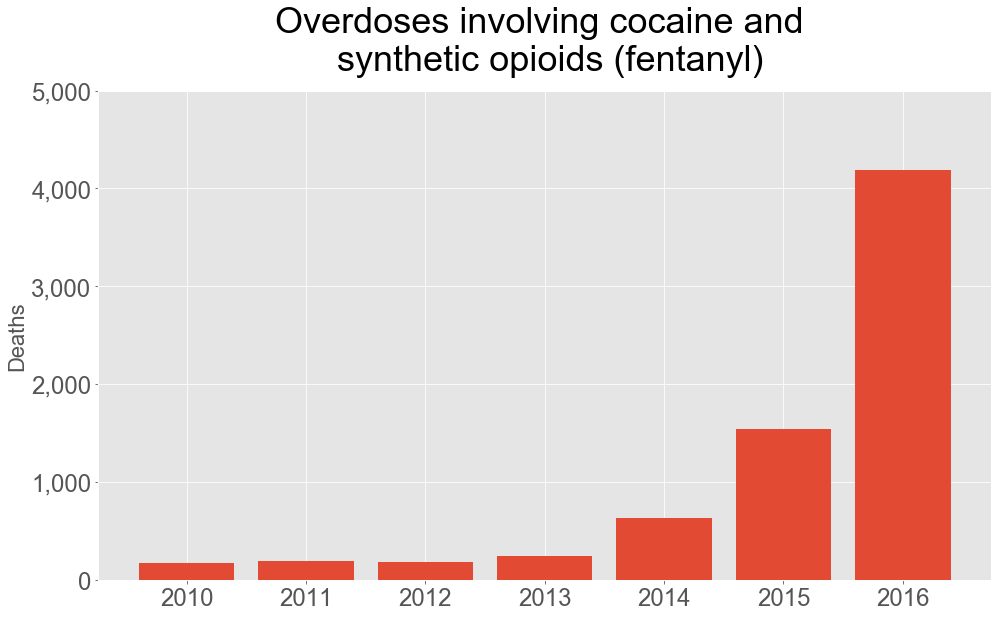

In [7]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (16,9))

ax.bar(
    coc_fen["Year"],
    coc_fen["Deaths"],
    linewidth=3
)

ax.tick_params(labelsize=22)

ax.set_ylim([ 0, 5000 ])

ax.locator_params(
    axis = "y",
    nbins = 5,
)

ax.set_yticklabels([ "{:,.0f}".format(y) for y in ax.get_yticks() ])

# set font of tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(tickfont)

for label in ax.get_yticklabels():
    label.set_fontproperties(tickfont)

ax.set_title("Overdoses involving cocaine and \n synthetic opioids (fentanyl)", fontproperties = titlefont)

ax.set_ylabel("Deaths", fontproperties = labelfont)
pass

---

---

---